# Victor 2D unsteady (transient) diffusion

### Finite Differences

We saw that the 1D diffusion equation can be represented by algebraic expressions that are easily solved using finite differences (see the "erodocone notebook for instance). Here we develop the 2D transient diffusion model using finite differences.

In 2D Cartesian coordinates, the diffusion equation is:

$$\frac{\partial T}{\partial t} = \alpha \left [ \frac{\partial^2 T}{\partial x^2} +  \frac{\partial^2 T}{\partial x^2} \right ] $$


which can be written as a finite differnce expression like:

$$ \frac{T_{i,j}^{k+1} - T_{i,j}^{k}}{\Delta t} = \alpha \left [ 
\frac{T_{i-1,j}^k - 2T_{i,j}^k + T_{i+1,j}^k }{\Delta x^2} + \frac{T_{i,j-1}^k - 2T_{i,j}^k + T_{i,j+1}^k }{\Delta y^2}
\right ] $$

Then assuming that $\Delta x = \Delta y = s$

$$T_{i,j}^{k+1} = T_{i,j}^{k} + \frac{\Delta t \alpha}{s^2} 
\left [ T_{i,j-1}^k + T_{i-1,j}^k  - 4T_{i,j}^k + T_{i+1,j}^k + T_{i,j+1}^k   \right ] $$

The maximum time step depends on the grid spacing and the diffusivity:

$$\Delta t_{max} = \frac{\Delta x^2 \Delta y^2 }{2 \alpha (\Delta x^2 + \Delta y^2)} = \frac{s^2}{4 \alpha}$$


In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 2D diffusion finite difference - from Gerya (Numerical Geodynamic Modelling)
def one_time_step(u0, u, D, dt, dx2, dy2):
    # Propagate with forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u


In [17]:
#run a simple test

#specify model space
w = h = 100.
# intervals in x-, y- directions, m
dx = dy = 1
# Thermal diffusivity of heat in wall rock, m2.s-1
D = 1e-6 #diffusivity in granite.

Tcool, Thot = 200, 1200

nx, ny = int(w/dx), int(h/dy)

dx2, dy2 = dx*dx, dy*dy
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

u0 = Tcool * np.ones((nx, ny))
u = u0.copy()

for i in range(nx):
    for j in range(ny):
        if i > nx/3 and i < 2*nx/3:
            u0[i,j] = Thot


In [18]:
# Number of timesteps
nsteps = 101

for m in range(nsteps):
    u0, u = one_time_step(u0, u, D, dt, dx2, dy2)
    #print(u0)

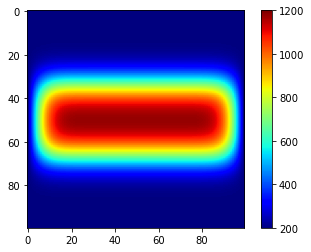

time elapsed =  292.2453703703704 days


In [23]:
plt.imshow(u0, cmap='jet', vmin=Tcool,vmax=Thot)
plt.colorbar()
plt.show()
print ("time elapsed = ", nsteps*dt/3600/24, "days")
